# Hierarchical Clustering (Overview)

This Colab demonstrates agglomerative (hierarchical) clustering using the Iris dataset. It includes steps to load the dataset from HuggingFace, standardize features, compute a dendrogram, run agglomerative clustering with different linkage methods, evaluate cluster quality with Silhouette score and Adjusted Rand Index (ARI), and visualize clusters using PCA.

Steps included:
1. Install dependencies (datasets, scipy, sklearn).
2. Load the Iris dataset from HuggingFace.
3. Standardize features and compute a dendrogram.
4. Run Agglomerative Clustering (Ward, Average, Complete, Single).
5. Compute evaluation metrics (Silhouette, ARI) and visualize results with PCA.

Run the cells sequentially in Colab (or locally) to reproduce the analysis. Click the badge below to open this notebook in Google Colab.

<a href="https://colab.research.google.com/github/ArshanBhanage/Clustering/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cell 1 – Setup & Imports

In [1]:

!pip install -q datasets

import numpy as np
import matplotlib.pyplot as plt

from datasets import load_dataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

from scipy.cluster.hierarchy import linkage, dendrogram


Cell 2 – Load Iris dataset from HuggingFace

In [ ]:
# Load Iris dataset from HuggingFace: BIT/iris-dataset
dataset = load_dataset("BIT/iris-dataset")["train"]
df = dataset.to_pandas()

df.head()


HuggingFace Cell 3 – Prepare features and labels

In [3]:
feature_cols = ["sepal length (cm)", "sepal width (cm)",
                "petal length (cm)", "petal width (cm)"]
target_col = "target"  # 0,1,2

X = df[feature_cols].values
y_true = df[target_col].values  # for evaluation only

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X_scaled shape:", X_scaled.shape)


X_scaled shape: (150, 4)


Cell 4 – Dendrogram (using scipy)

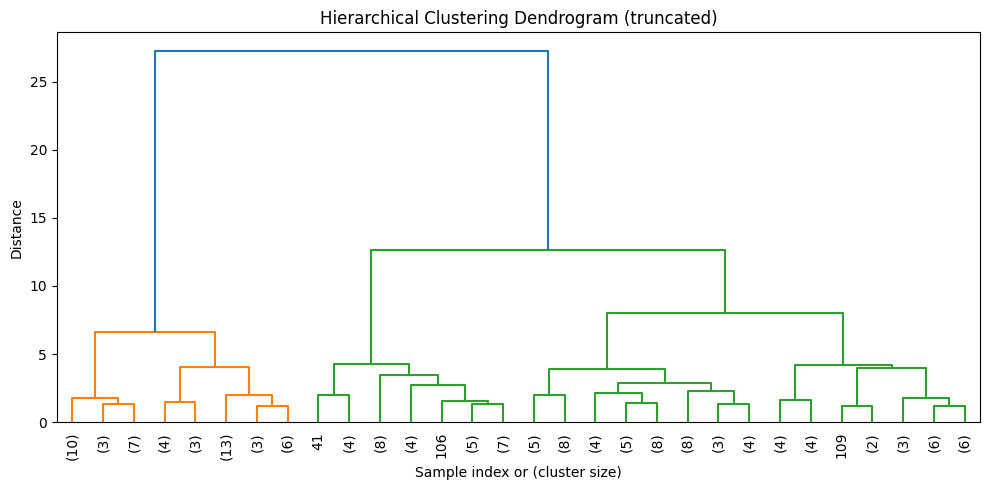

In [4]:
# Compute linkage matrix using Ward's method (minimizes variance)
Z = linkage(X_scaled, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="lastp", p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


Cell 5 – Agglomerative Clustering (K=3)

In [6]:
# We know Iris has 3 classes, so let's set n_clusters = 3
n_clusters = 3

agg = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage="ward"
)

labels = agg.fit_predict(X_scaled)

print("Cluster labels (first 20):", labels[:20])


Cluster labels (first 20): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Cell 6 – Clustering quality metrics

In [7]:
# Silhouette score (unsupervised)
sil_score = silhouette_score(X_scaled, labels)
print("Silhouette score:", sil_score)

# Adjusted Rand Index – compares with true labels (just for reference)
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index (vs true species):", ari)


Silhouette score: 0.446689041028591
Adjusted Rand Index (vs true species): 0.6153229932145449


Cell 7 – 2D visualization with PCA

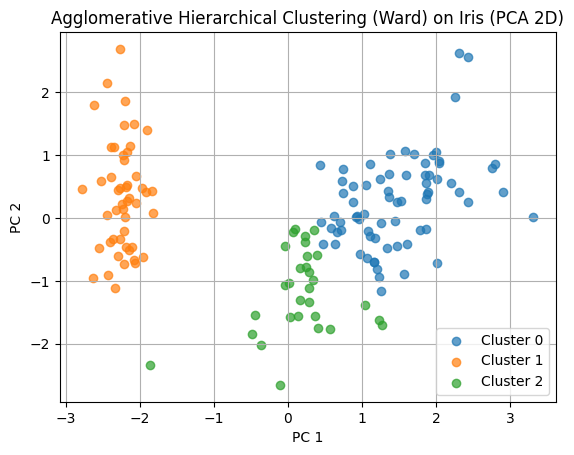

In [8]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.figure()
for cluster_id in range(n_clusters):
    mask = labels == cluster_id
    plt.scatter(
        X_2d[mask, 0],
        X_2d[mask, 1],
        label=f"Cluster {cluster_id}",
        alpha=0.7
    )

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Agglomerative Hierarchical Clustering (Ward) on Iris (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()


Cell 8 – Compare different linkage methods

In [10]:
linkage_methods = ["ward", "average", "complete", "single"]
results = {}

for method in linkage_methods:
    # Note: 'ward' requires euclidean; others can use euclidean as well
    agg = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage=method
    )
    labels_method = agg.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels_method)
    ari = adjusted_rand_score(y_true, labels_method)
    results[method] = (sil, ari)

print("Linkage method comparison:")
for method, (sil, ari) in results.items():
    print(f"{method:8s} -> Silhouette: {sil:.3f}, ARI: {ari:.3f}")


Linkage method comparison:
ward     -> Silhouette: 0.447, ARI: 0.615
average  -> Silhouette: 0.480, ARI: 0.562
complete -> Silhouette: 0.450, ARI: 0.573
single   -> Silhouette: 0.505, ARI: 0.558
